In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
# Load the data
data = pd.read_csv('data/train_processed.csv').drop(columns=['id'])
print(data.head())

      amt  city_pop  trans_hour  day_of_week  location_diff  age  category  \
0  188.38     95666           6            2       1.467427   41         9   
1  102.63     37941           2            5       0.766755   48         4   
2    1.62     19515          21            3       1.288962   25         0   
3    5.64     62039          16            6       1.075675   94         5   
4   97.09    106841          19            6       1.176964   73         5   

   merchant  job  gender  is_fraud  
0       638    6       0       0.0  
1       550  160       0       0.0  
2       450   80       1       0.0  
3       105  377       1       0.0  
4       350  451       0       0.0  


In [15]:
# Get the first 5k for training
# data = data[:5000]
# Split the data into features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9307400763410258


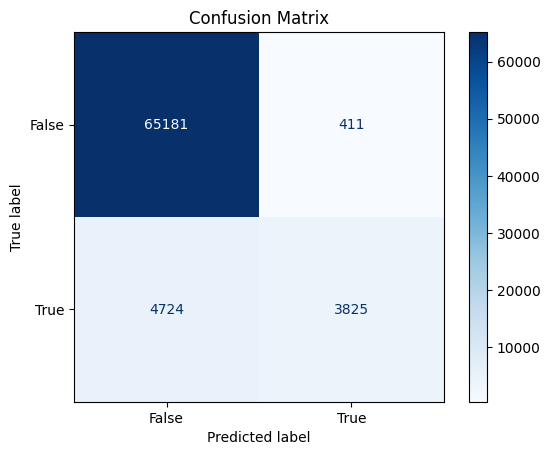

In [4]:
# Linear SVM model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9303219541144576


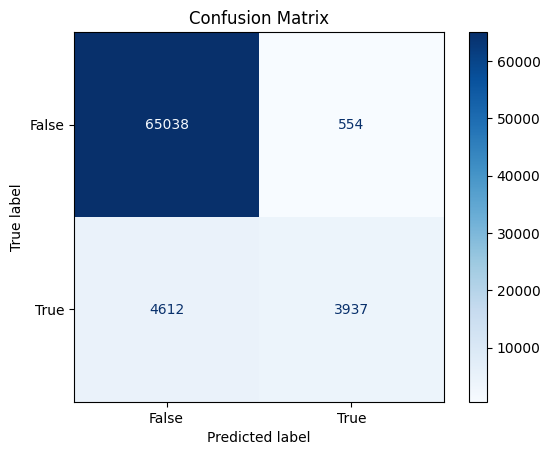

In [5]:
# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9834369647023914


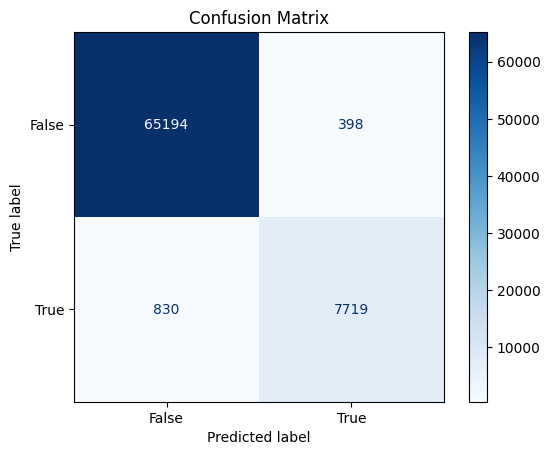

In [6]:
# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.966482782805735


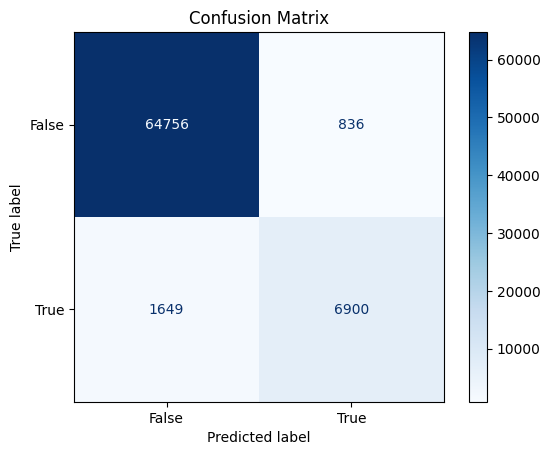

In [7]:
# Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9654037577049136


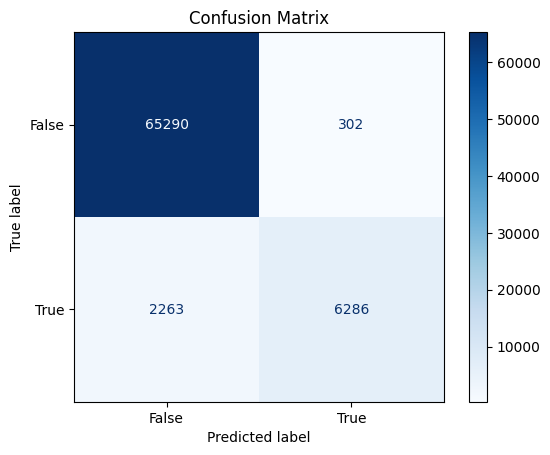

In [9]:
# Combine the result of the models, and use a voting classifier
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('logistic', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Train random forest on the entire dataset
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Load the test data
test_data = pd.read_csv('data/test_processed.csv')
print(test_data.head())

# Predict the test data
X_test = test_data.drop(columns=['id', 'is_fraud'])
y_pred = model.predict(X_test)

# Save the result
test_data['is_fraud'] = y_pred
result = test_data[['id', 'is_fraud']]
result.to_csv('data/submission.csv', index=False)


       id     amt  city_pop  trans_hour  day_of_week  location_diff  age  \
0   52329   13.00   2504700          13            5       0.146915   69   
1   92215   25.64    419138          21            2       0.476626   84   
2  107070   99.48      4953          23            2       0.653179   31   
3  117508  972.26      2846          14            0       1.620799   66   
4  525132  165.04     13835          22            1       0.811820   52   

   category  merchant  job  gender  is_fraud  
0         7       396  345       1       NaN  
1        13       292  385       1       NaN  
2         6       213  197       1       NaN  
3         4       563  276       0       NaN  
4        10       591    5       1       NaN  
